In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.0MB/s 
     |████████████████████████████████| 9.5MB 18.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/TamilNadu1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,23,23.942629,949.792664,95.038603,109.027520,0
131396,2014,12,31,20,0,0,0,0,0,0,0,22,23.816937,950.480530,95.051303,122.815953,0
131397,2014,12,31,21,0,0,0,0,0,0,0,22,23.651271,950.498596,95.063357,136.493751,0
131398,2014,12,31,22,0,0,0,0,0,0,0,22,23.463472,950.312073,94.849659,149.723659,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,16,18.991073,951.739258,88.086527,105.737471,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,16,19.082109,952.528564,86.906296,92.034323,0,2000-01-01 06:00:00
7,2000,1,1,7,0,78,302,138,71,355,141,17,20.282244,953.285584,81.499087,78.560168,0,2000-01-01 07:00:00
8,2000,1,1,8,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,2000-01-01 08:00:00
9,2000,1,1,9,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2014-12-27,428.9
2014-12-28,447.0
2014-12-29,516.3


In [9]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,460.071429
2000-01-14,375.842857
2000-01-21,544.685714
2000-01-28,611.442857
2000-02-04,530.300000
...,...
2014-12-05,395.628571
2014-12-12,455.342857
2014-12-19,351.714286


In [10]:
y_w[:'2011']

,GHI
Date,
2000-01-07,460.071429
2000-01-14,375.842857
2000-01-21,544.685714
2000-01-28,611.442857
2000-02-04,530.300000
...,...
2011-12-02,369.928571
2011-12-09,518.342857
2011-12-16,485.157143


In [11]:
y[:4382]

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2011-12-29,525.3
2011-12-30,442.1
2011-12-31,164.2


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
type(y)

pandas.core.frame.DataFrame

In [14]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [15]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [16]:
type(X_T[:626])

numpy.ndarray

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=7))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[507.0687]]
[[506.43597]]
[[597.35474]]
[[619.2473]]
[[556.8052]]
[[552.53033]]
[[598.9106]]
[[645.46436]]
[[628.79016]]
[[604.22144]]
[[599.5278]]
[[674.3605]]
[[599.411]]
[[656.39856]]
[[581.86414]]
[[615.7828]]
[[550.44763]]
[[610.8725]]
[[600.5719]]
[[603.63556]]
[[605.6548]]
[[626.36597]]
[[567.6008]]
[[542.6345]]
[[568.9911]]
[[511.91476]]
[[630.9302]]
[[558.6174]]
[[602.6732]]
[[603.955]]
[[633.85406]]
[[578.3496]]
[[522.5088]]
[[522.959]]
[[537.5641]]
[[604.9192]]
[[617.0768]]
[[580.6249]]
[[618.78284]]
[[607.47174]]
[[531.05817]]
[[475.0348]]
[[406.7803]]
[[472.18134]]
[[474.9396]]
[[519.9892]]
[[397.2388]]
[[543.9239]]
[[395.23093]]
[[533.8981]]
[[341.94565]]
[[397.22687]]
[[538.9332]]
[[523.87634]]
[[568.21936]]
[[606.433]]
[[615.7567]]
[[537.802]]
[[385.9227]]
[[660.74603]]
[[665.1287]]
[[480.4893]]
[[619.11475]]
[[679.59143]]
[[656.1476]]
[[624.48926]]
[[629.7462]]
[[630.8392]]
[[619.5612]]
[[551.2233]]
[[575.1914]]
[[634.1812]]
[[632.52045]]
[[562.1754]]
[[597.80524]]
[[

[array([[507.0687]], dtype=float32),
 array([[506.43597]], dtype=float32),
 array([[597.35474]], dtype=float32),
 array([[619.2473]], dtype=float32),
 array([[556.8052]], dtype=float32),
 array([[552.53033]], dtype=float32),
 array([[598.9106]], dtype=float32),
 array([[645.46436]], dtype=float32),
 array([[628.79016]], dtype=float32),
 array([[604.22144]], dtype=float32),
 array([[599.5278]], dtype=float32),
 array([[674.3605]], dtype=float32),
 array([[599.411]], dtype=float32),
 array([[656.39856]], dtype=float32),
 array([[581.86414]], dtype=float32),
 array([[615.7828]], dtype=float32),
 array([[550.44763]], dtype=float32),
 array([[610.8725]], dtype=float32),
 array([[600.5719]], dtype=float32),
 array([[603.63556]], dtype=float32),
 array([[605.6548]], dtype=float32),
 array([[626.36597]], dtype=float32),
 array([[567.6008]], dtype=float32),
 array([[542.6345]], dtype=float32),
 array([[568.9911]], dtype=float32),
 array([[511.91476]], dtype=float32),
 array([[630.9302]], dtype=

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

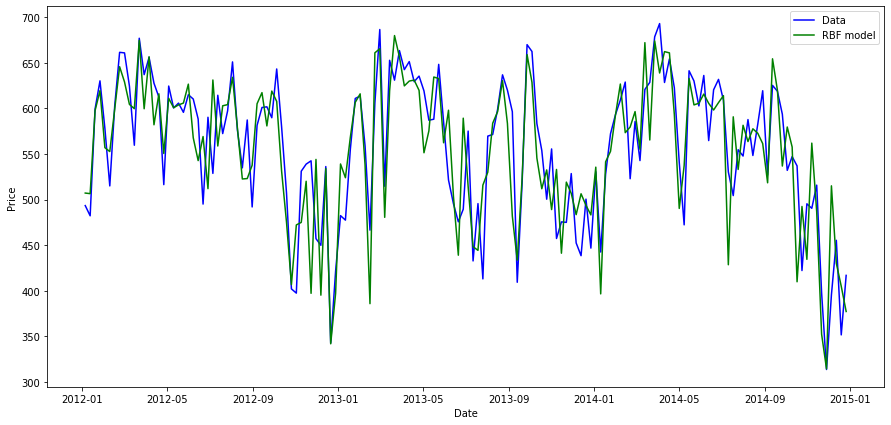

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))

45.0841075444196


In [22]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))

0.06602541951768459


In [23]:
X_train = y_w[:'2011']
X_test = y_w['2012':]

In [24]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=7014.584, Time=2.58 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=6800.317, Time=7.09 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=17.00 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=6934.287, Time=0.58 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=31.21 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=39.43 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=6866.427, Time=5.97 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=23.51 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=6616.981, Time=28.86 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=6740.837, Time=2.43 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=inf, Time=30.56 sec
 ARIMA(0,1,1)(1,1,0)[52] intercept   : AIC=6618.955, Time=33.40 sec

Best model:  ARIMA(0,1,1)(1,1,0)[52]          
Total fit time: 222.637 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  626
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood               -3305.490
Date:                             Sun, 02 May 2021   AIC                           6616.981
Time:                                     12:17:13   BIC                           6630.034
Sample:                                          0   HQIC                          6622.072
                                             - 626                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9456      0.015    -61.400      0.000      -0.976      -0.915
ar.S.L52      -0.4595      0.035    -13.184      0.000      -0.528      -0.391
sigma2      5855.2314    281.604     20.792      0.000    5303.298    6407.165
===================================================================================
Ljung-Box (L1) (Q):                  18.20   Jarque-Bera (JB):                34.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.29
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
stepwise_model.fit(X_train)
pred=stepwise_model.predict(n_periods=156)
pred

array([550.74269592, 487.14069382, 560.30134174, 584.56236464,
       599.03573314, 596.22210098, 621.00031454, 609.65625621,
       677.28665766, 671.68600487, 692.31264588, 691.75278005,
       685.79517645, 654.22101578, 642.32172125, 587.38536082,
       555.60759431, 610.27068663, 651.3432968 , 595.86202902,
       590.29830255, 597.65672227, 568.57734232, 526.2048044 ,
       613.59969541, 610.11626655, 531.24052097, 566.83874876,
       505.8063606 , 480.45259788, 582.21226614, 621.0136398 ,
       561.37305877, 515.4210211 , 551.74948092, 654.63326992,
       577.37149839, 596.59369764, 561.51823576, 547.15530184,
       576.51094592, 577.71708269, 487.97448434, 456.09219868,
       531.77813011, 503.25364486, 432.45498904, 350.16669173,
       484.11998839, 495.77449936, 485.79140194, 496.94191383,
       547.92315665, 498.19884748, 555.47902305, 584.11660158,
       596.29159972, 616.60343413, 635.60857569, 590.85972509,
       681.51002493, 688.67709093, 707.0596538 , 693.15

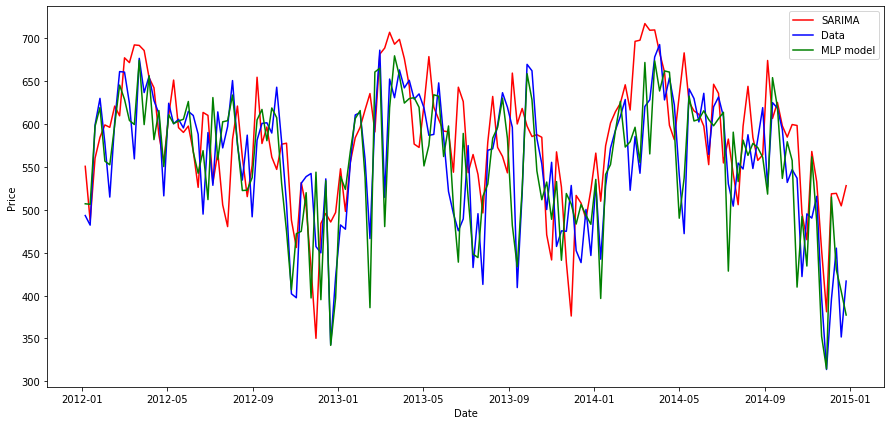

In [26]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, pred, color= 'red', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

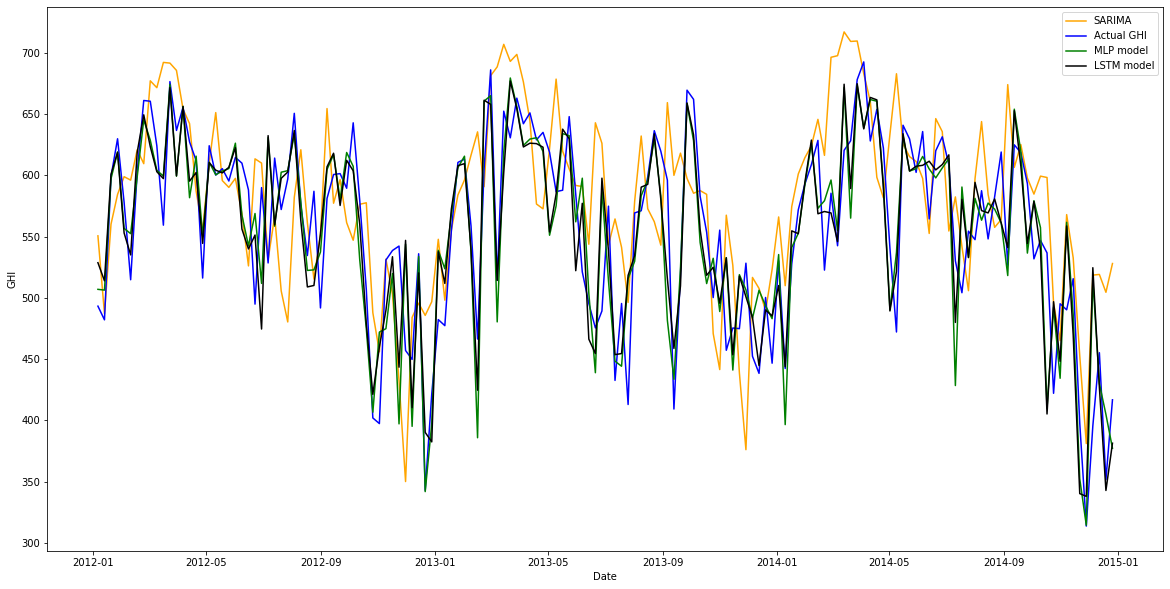

In [28]:
LSTM = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/TamilNadu1/LSTMweekly.csv')
plt.figure(figsize = (20,10))
plt.plot(y_w[626:-1].index, pred, color= 'orange', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Actual GHI')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.plot(y_w[626:-1].index, LSTM['GHI'], color= 'black', label= 'LSTM model')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
hybrid=pd.DataFrame(columns=['Values','Model'])
for i in range (156):
  if abs(yhat[i]-y_w.iloc[626+i]['GHI'])<abs(pred[i]-y_w.iloc[626+i]['GHI']):
    hybrid.loc[i]=[yhat[i][0][0],-1]
  else:
    hybrid.loc[i]=[pred[i],1]
hybrid

,Values,Model
0,532.024902,-1.0
1,487.140694,1.0
2,608.095215,-1.0
3,624.844482,-1.0
4,561.689636,-1.0
...,...,...
151,328.283966,-1.0
152,518.703595,1.0
153,444.254822,-1.0
154,409.641602,-1.0


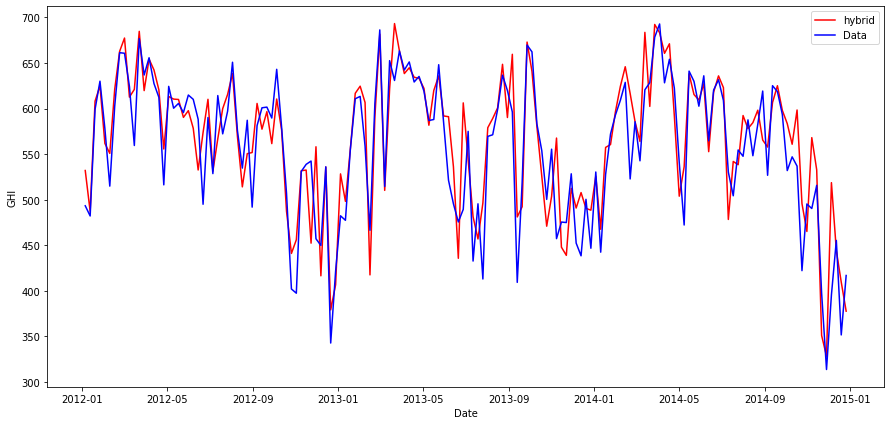

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, hybrid['Values'], color= 'red', label= 'hybrid')
#plt.scatter(y_w[626:678].index, hybrid['Model'][:52], color= 'red', label= 'hybrid1',marker='+')
#plt.scatter(y_w[626:678].index, hybrid['Model'][52:104], color= 'blue', label= 'hybrid2',marker='|',s=hybrid['Model'][52:104]*50)
#plt.scatter(y_w[626:678].index, hybrid['Model'][104:156], color= 'green', label= 'hybrid3',marker='_')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))
print(mean_squared_error(y_w[626:-1],pred,squared=False))
print(mean_squared_error(y_w[626:-1],hybrid['Values'],squared=False))

45.49534467317039
70.29435256211939
37.9158421981777


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))
print(mean_absolute_percentage_error(y_w[626:-1],pred))
print(mean_absolute_percentage_error(y_w[626:-1],hybrid['Values']))

0.06823567940581612
0.10784340746869393
0.05527622567574808
